In [177]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/janatahack-mobility-analysis/test.csv
/kaggle/input/janatahack-mobility-analysis/sample_submission.csv
/kaggle/input/janatahack-mobility-analysis/train.csv


# Project Objective

Sigma Cab Private Limited - 
    
Cab aggregator service. Their customers can download their app on smartphones and book a cab from any where in the cities they operate in. They, in turn search for cabs from various service providers and provide the best option to their client across available options. They have been in operation for little less than a year now. During this period, they have captured surge_pricing_type from the service providers.

The task is to help them in predicting the surge_pricing_type pro-actively. This would in turn help them in matching the right cabs with the right customers quickly and efficiently.


In [178]:
train = pd.read_csv('/kaggle/input/janatahack-mobility-analysis/train.csv')
test = pd.read_csv('/kaggle/input/janatahack-mobility-analysis/test.csv')
submit = pd.read_csv('/kaggle/input/janatahack-mobility-analysis/sample_submission.csv')

# Data Dictionary

**Trip_ID  **              =    ID for TRIP (Can not be used for purposes of modelling)

Trip_Distance          =    The distance for the trip requested by the customer

Type_of_Cab            =    Category of the cab requested by the customer

Customer_Since_Months  =    Customer using cab services since n months; 0 month means current month

Life_Style_Index       =    Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour

Confidence_Life_Style_Index    =    Category showing confidence on the index mentioned above

Destination_Type       =    Sigma Cabs divides any destination in one of the 14 categories.

Customer_Rating        =    Average of life time ratings of the customer till date

Cancellation_Last_1Month    =    Number of trips cancelled by the customer in last 1 month

Var1, Var2 and Var3    =     Continuous variables masked by the company. Can be used for modelling purposes

Gender                 =        Gender of the customer

Surge_Pricing_Type     =   Predictor variable can be of 3 types



In [179]:
print(train.shape)
print(test.shape)

(131662, 14)
(87395, 13)


In [180]:
train

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
131658,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,NaN,48,75,Female,2
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2


In [181]:
train.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [182]:
train.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

Missing values are found in Type_of_cab ( object ), Customer_Since_Months ( Float ), Life_Style_Index ( Float ), Confidence_Life_Style_Index ( Float ) and var1 ( Float )

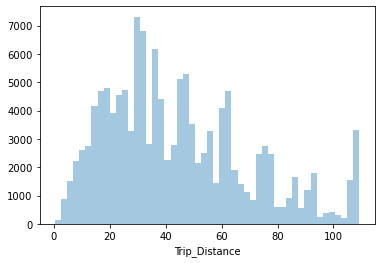

In [183]:
sns.distplot(train['Trip_Distance'],kde = False,norm_hist=False)

* The distribution is not normal

In [184]:
train['Trip_Distance'].max()
train['Trip_Distance'].min()

0.31

The maximum distance that the customers are travelling is 110 while minimum is 0.5

In [185]:
train['Type_of_Cab'].unique()

array(['B', nan, 'C', 'E', 'D', 'A'], dtype=object)

A,B,C,D,E are the categories of cab


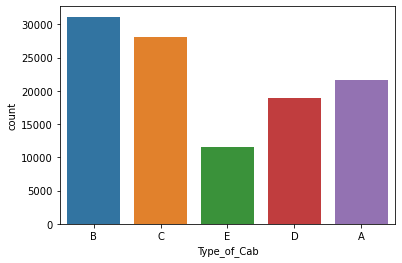

In [186]:
sns.countplot(train['Type_of_Cab'])

Majority is Type B

In [187]:
train['Type_of_Cab'].isna().sum()

20210

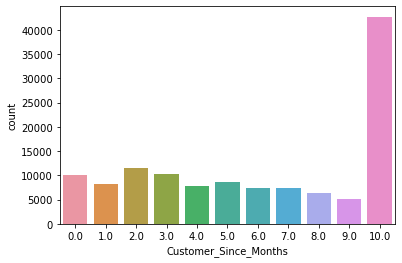

In [188]:
#train['Customer_Since_Months'].astype(int)
train['Customer_Since_Months'].value_counts()
sns.countplot(train['Customer_Since_Months'])

Customer using cab services since n months; 0 month means current month


So, more use from 10 months

In [189]:
train['Destination_Type'].unique()

array(['A', 'E', 'B', 'C', 'G', 'D', 'F', 'K', 'L', 'H', 'I', 'J', 'M',
       'N'], dtype=object)

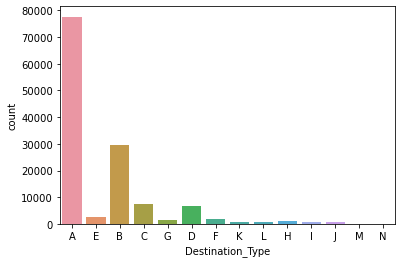

In [190]:
sns.countplot(train['Destination_Type'])

In [191]:
train['Destination_Type'].value_counts()

A    77597
B    29555
C     7484
D     6588
E     2717
F     1950
G     1489
H     1260
I      813
J      695
K      680
L      643
N       98
M       93
Name: Destination_Type, dtype: int64

In [192]:
train.Cancellation_Last_1Month.value_counts()

0    68687
1    36834
2    16223
3     7142
4     1823
5      668
6      266
7       16
8        3
Name: Cancellation_Last_1Month, dtype: int64

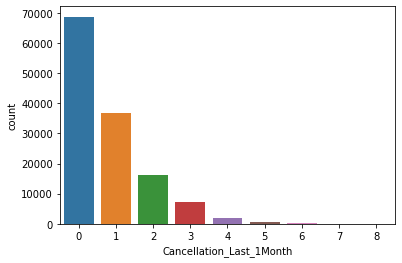

In [193]:
sns.countplot(train.Cancellation_Last_1Month)

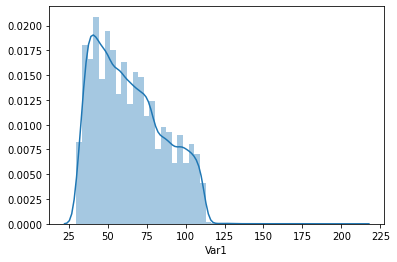

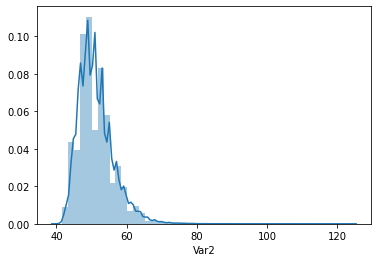

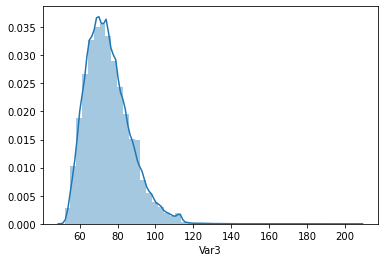

In [194]:
var = [train['Var1'],train['Var2'],train['Var3']]
for variables in var:
    sns.distplot(variables)
    plt.show()

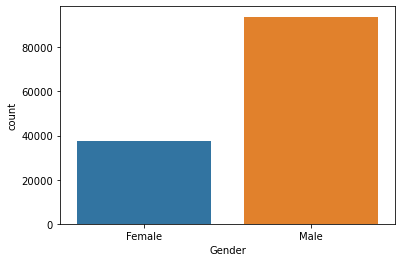

In [195]:
sns.countplot(train['Gender'])

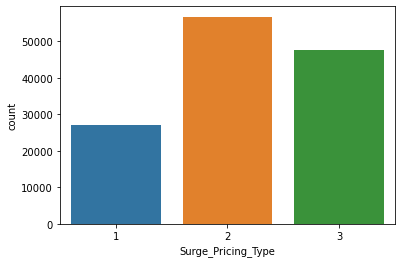

In [196]:
sns.countplot(train['Surge_Pricing_Type'])

In [197]:
train.dropna()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
6,T0005689470,29.72,E,10.0,2.83958,C,B,2.97500,1,83.0,50,75,Male,2
7,T0005689472,18.44,B,2.0,2.81871,B,A,3.58250,0,103.0,46,63,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131642,T0005908483,15.93,E,3.0,2.36752,A,G,4.53125,0,98.0,42,54,Female,2
131656,T0005908508,22.90,D,10.0,2.51438,A,A,1.47250,2,33.0,52,78,Female,3
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
131660,T0005908513,46.88,B,4.0,3.04744,A,B,4.15750,1,47.0,54,79,Male,2


In [198]:
df = train.append(test)

In [199]:
test.shape

(87395, 13)

In [200]:
test.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [201]:
df.isna().sum()

Trip_ID                             0
Trip_Distance                       0
Type_of_Cab                     33368
Customer_Since_Months            9886
Life_Style_Index                33520
Confidence_Life_Style_Index     33520
Destination_Type                    0
Customer_Rating                     0
Cancellation_Last_1Month            0
Var1                           117819
Var2                                0
Var3                                0
Gender                              0
Surge_Pricing_Type              87395
dtype: int64

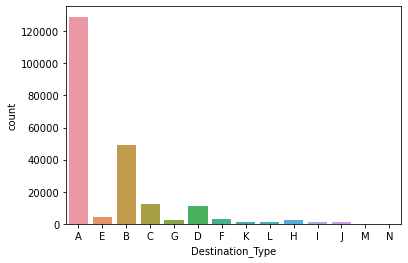

In [202]:
sns.countplot(df['Destination_Type'])

In [203]:
df['Destination_Type'].fillna(df['Destination_Type'].mode(),inplace = True)

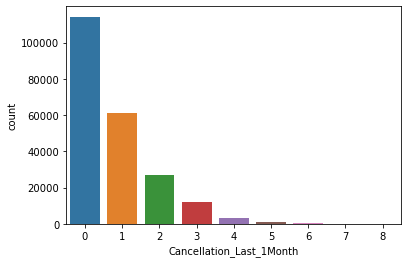

In [204]:
sns.countplot(df['Cancellation_Last_1Month'])

In [205]:
df['Cancellation_Last_1Month'].isna().sum()

0

In [206]:
df[df['Type_of_Cab'].isna() == True]

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2.0
11,T0005689477,90.93,NaN,0.0,2.95327,C,C,2.93500,1,NaN,46,63,Male,2.0
15,T0005689485,14.18,NaN,1.0,2.16167,A,A,3.19750,1,NaN,46,57,Female,2.0
28,T0005689505,31.82,NaN,10.0,2.70044,C,B,3.15125,1,NaN,51,66,Male,1.0
32,T0005689509,18.34,NaN,4.0,2.59621,A,B,3.15875,0,NaN,53,72,Male,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87369,T0005908451,16.62,NaN,0.0,NaN,NaN,G,1.25875,2,NaN,66,93,Male,NaN
87375,T0005908468,17.07,NaN,4.0,2.70295,A,B,3.55750,0,NaN,47,65,Male,NaN
87379,T0005908477,20.50,NaN,0.0,2.18845,A,B,3.41500,0,NaN,43,57,Female,NaN
87381,T0005908482,20.45,NaN,5.0,2.61062,C,A,2.76125,2,109.0,47,65,Female,NaN


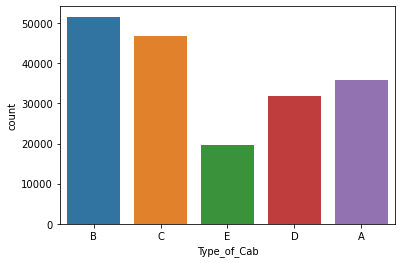

In [207]:
sns.countplot(df['Type_of_Cab'])

In [208]:
df['Type_of_Cab'] = df['Type_of_Cab'].fillna('F')

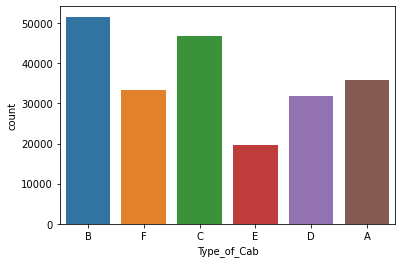

In [209]:
sns.countplot(df['Type_of_Cab'])

In [210]:
df['Customer_Since_Months'].value_counts()

10.0    70817
2.0     19445
3.0     17074
0.0     16885
5.0     14405
1.0     13965
4.0     13035
7.0     12332
6.0     12279
8.0     10525
9.0      8409
Name: Customer_Since_Months, dtype: int64

In [211]:
df[df['Customer_Since_Months'].isna() == True]

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
13,T0005689482,31.16,B,NaN,2.69170,B,A,2.14750,0,NaN,53,90,Female,1.0
18,T0005689491,13.94,B,NaN,2.35974,B,B,1.79750,0,NaN,50,64,Male,2.0
35,T0005689515,36.10,B,NaN,2.70134,B,A,1.83500,0,NaN,59,95,Male,1.0
69,T0005689566,78.98,D,NaN,NaN,NaN,L,4.04875,2,NaN,49,68,Male,3.0
107,T0005689632,21.46,B,NaN,2.63792,B,A,3.62625,4,NaN,47,78,Female,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87273,T0005908216,32.49,C,NaN,2.58539,B,A,3.32250,0,NaN,48,65,Male,NaN
87304,T0005908291,46.13,C,NaN,3.04394,C,A,3.33625,0,44.0,50,76,Male,NaN
87328,T0005908341,10.26,C,NaN,2.18827,B,A,2.85250,1,89.0,48,62,Female,NaN
87331,T0005908350,11.21,C,NaN,2.17327,B,B,0.98375,0,72.0,48,63,Male,NaN


In [212]:
df[df['Customer_Since_Months'].isna() == False].mean()

Trip_Distance               44.566789
Customer_Since_Months        6.006048
Life_Style_Index             2.810833
Customer_Rating              2.855769
Cancellation_Last_1Month     0.784841
Var1                        63.971200
Var2                        51.240975
Var3                        75.121045
Surge_Pricing_Type           2.154443
dtype: float64

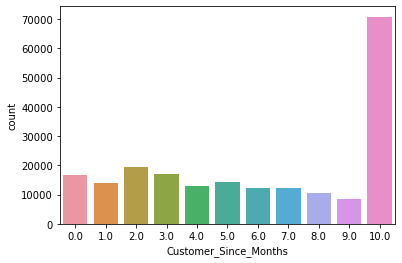

In [213]:
sns.countplot(df['Customer_Since_Months'])

In [214]:
df['Customer_Since_Months'].fillna(10.0,inplace = True)

In [215]:
df.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

Minimum Value 1.31785
Maximum Value 4.87511
Average Value 2.802594092714649


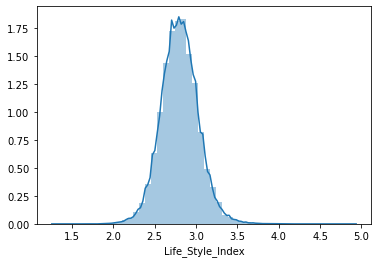

In [216]:
print("Minimum Value",df['Life_Style_Index'].min())
print("Maximum Value",df['Life_Style_Index'].max())
print("Average Value",df['Life_Style_Index'].mean())
sns.distplot(df['Life_Style_Index'])

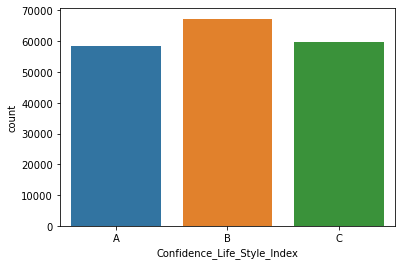

In [217]:
sns.countplot(df['Confidence_Life_Style_Index'])

In [218]:
df.groupby('Confidence_Life_Style_Index')['Life_Style_Index'].median()

Confidence_Life_Style_Index
A    2.749825
B    2.829390
C    2.812905
Name: Life_Style_Index, dtype: float64

In [219]:
print(df['Life_Style_Index'].mean())
df['Life_Style_Index'].median()

2.802594092714649


2.79828

In [220]:
df['Life_Style_Index'].fillna(df['Life_Style_Index'].mean(),inplace = True)
df['Confidence_Life_Style_Index'].fillna('D',inplace = True)

In [221]:
print(df['Var1'].mean())
print(df['Var1'].median())

64.09597186827081
61.0


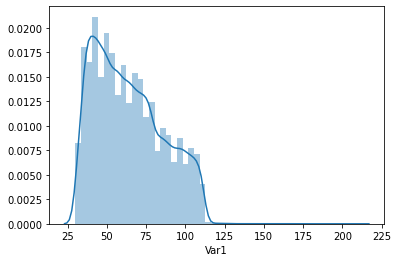

In [222]:
sns.distplot(df['Var1'])

In [223]:
df['Var1'].value_counts()

39.0     2073
43.0     1991
42.0     1976
38.0     1972
40.0     1969
         ... 
141.0       1
210.0       1
139.0       1
200.0       1
159.0       1
Name: Var1, Length: 130, dtype: int64

In [224]:
df[['Var1','Var2','Var3']].corr()

,Var1,Var2,Var3
Var1,1.000000,-0.048249,-0.059432
Var2,-0.048249,1.000000,0.682716
Var3,-0.059432,0.682716,1.000000


In [225]:
df.groupby('Var1')[['Var2','Var3']].mean()

,Var2,Var3
Var1,,
30.0,50.643021,73.368421
31.0,52.731707,79.892396
32.0,52.449827,79.509804
33.0,52.178138,78.845142
34.0,52.157233,78.866352
...,...,...
173.0,51.000000,79.000000
178.0,52.000000,71.000000
179.0,49.000000,74.000000


In [226]:
df['Var1'].fillna(64,inplace = True)

In [227]:
df.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months              0
Life_Style_Index                   0
Confidence_Life_Style_Index        0
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                               0
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type             87395
dtype: int64

In [228]:
df[['Var1','Var2','Var3']] = df[['Var1','Var2','Var3']].astype(int)

In [229]:
df['Customer_Since_Months'] = df['Customer_Since_Months'].astype(int)

In [230]:
categorical = ['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type','Gender']

In [231]:
from sklearn import preprocessing 
  

label_encoder = preprocessing.LabelEncoder() 
for i in categorical:
    df[i]= label_encoder.fit_transform(df[i]) 

In [232]:
df

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,1,1,2.427690,0,0,3.90500,0,40,46,60,0,2.0
1,T0005689461,29.47,1,10,2.782450,1,0,3.45000,0,38,56,78,1,2.0
2,T0005689464,41.58,5,10,2.802594,3,4,3.50125,2,64,56,77,1,2.0
3,T0005689465,61.56,2,10,2.802594,3,0,3.45375,0,64,52,74,1,3.0
4,T0005689467,54.95,2,10,3.034530,1,0,3.40250,4,51,49,102,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87390,T0005908503,29.43,2,3,2.407200,2,0,0.99750,0,74,48,72,0,NaN
87391,T0005908504,14.83,2,10,2.570090,0,3,4.74375,0,109,42,60,0,NaN
87392,T0005908505,37.86,0,6,3.082270,2,0,1.63500,0,64,57,77,1,NaN
87393,T0005908511,10.63,2,1,2.802594,3,9,2.59875,1,107,51,77,1,NaN


In [233]:
trains = df[df['Surge_Pricing_Type'].isna() == False]
tests = df[df['Surge_Pricing_Type'].isna() == True]

In [234]:
trains['Surge_Pricing_Type'] = trains['Surge_Pricing_Type'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [235]:
trains

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,1,1,2.427690,0,0,3.90500,0,40,46,60,0,2
1,T0005689461,29.47,1,10,2.782450,1,0,3.45000,0,38,56,78,1,2
2,T0005689464,41.58,5,10,2.802594,3,4,3.50125,2,64,56,77,1,2
3,T0005689465,61.56,2,10,2.802594,3,0,3.45375,0,64,52,74,1,3
4,T0005689467,54.95,2,10,3.034530,1,0,3.40250,4,51,49,102,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,3,1,2.742290,0,0,3.28500,0,61,47,76,1,3
131658,T0005908510,74.81,2,7,2.810590,2,0,0.44500,0,64,63,88,1,2
131659,T0005908512,40.17,2,10,2.995650,1,0,3.33625,0,64,48,75,0,2
131660,T0005908513,46.88,1,4,3.047440,0,1,4.15750,1,47,54,79,1,2


In [236]:
tests

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689459,9.44,0,10,2.574380,0,1,3.68000,2,64,46,63,1,NaN
1,T0005689462,32.15,1,10,2.851430,0,0,1.59375,0,65,49,80,0,NaN
2,T0005689463,10.38,2,4,2.705300,0,3,4.50500,0,64,47,74,1,NaN
3,T0005689466,14.94,5,6,2.481590,2,4,4.53000,0,63,43,54,1,NaN
4,T0005689468,32.03,1,7,2.815980,0,10,4.60125,3,96,44,56,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87390,T0005908503,29.43,2,3,2.407200,2,0,0.99750,0,74,48,72,0,NaN
87391,T0005908504,14.83,2,10,2.570090,0,3,4.74375,0,109,42,60,0,NaN
87392,T0005908505,37.86,0,6,3.082270,2,0,1.63500,0,64,57,77,1,NaN
87393,T0005908511,10.63,2,1,2.802594,3,9,2.59875,1,107,51,77,1,NaN


In [ ]:
trains.to_csv('train.csv',index = False)
tests.to_csv('test.csv',index = False)

Model building

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
categorical = ['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type','Gender']

In [ ]:
trains.columns

In [ ]:
train_x = trains.drop(columns=['Surge_Pricing_Type','Trip_ID'],axis=1)
train_y = trains['Surge_Pricing_Type']

In [ ]:
test_x = tests.drop(columns=['Surge_Pricing_Type','Trip_ID'],axis=1)

In [159]:
trains

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,1,1,2.427690,0,0,3.90500,0,40,46,60,0,1
1,T0005689461,29.47,1,10,2.782450,1,0,3.45000,0,38,56,78,1,1
2,T0005689464,41.58,5,10,2.802594,3,4,3.50125,2,64,56,77,1,1
3,T0005689465,61.56,2,10,2.802594,3,0,3.45375,0,64,52,74,1,2
4,T0005689467,54.95,2,10,3.034530,1,0,3.40250,4,51,49,102,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,T0005908509,11.72,3,1,2.742290,0,0,3.28500,0,61,47,76,1,2
131658,T0005908510,74.81,2,7,2.810590,2,0,0.44500,0,64,63,88,1,1
131659,T0005908512,40.17,2,10,2.995650,1,0,3.33625,0,64,48,75,0,1
131660,T0005908513,46.88,1,4,3.047440,0,1,4.15750,1,47,54,79,1,1


In [160]:
#import h2o
#h2o.init()
#train1 = h2o.H2OFrame(train)
#test1 = h2o.H2OFrame(tests)
#train1.columns
#y = 'Surge_Pricing_Type'
#x = train1.col_names
#x.remove(y)
#train1['Surge_Pricing_Type'] = train1['Surge_Pricing_Type'].asfactor()
#train1['Surge_Pricing_Type'].levels()
#from h2o.automl import H2OAutoML
#aml = H2OAutoML(max_models = 20,max_runtime_secs=2000, seed = 42)
#aml.train(x = x, y = y, training_frame = train1)
#preds = aml.predict(test1)
#ans=h2o.as_list(preds) 
#submit['target'] = ans['predict']
#submit.to_csv('Solution_of_H20_EDA.csv',index=False)

In [161]:
def extra_tree(Xtrain,Ytrain,Xtest):
    extra = ExtraTreesClassifier()
    extra.fit(Xtrain, Ytrain) 
    extra_prediction = extra.predict(Xtest)
    return extra_prediction

def Xg_boost(Xtrain,Ytrain,Xtest):
    xg = XGBClassifier(loss='exponential', learning_rate=0.05, n_estimators=1000, subsample=1.0, criterion='friedman_mse', 
                                  min_samples_split=2, 
                                  min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_depth=10, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, 
                                  init=None, random_state=None, max_features=None, verbose=1, max_leaf_nodes=None, warm_start=False, 
                                  presort='deprecated', 
                                  validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
    xg.fit(Xtrain, Ytrain) 
    xg_prediction = xg.predict(Xtest)
    return xg_prediction
def LGBM(Xtrain,Ytrain,Xtest):
    lgbm = LGBMClassifier(boosting_type='gbdt', num_leaves=40,
                            max_depth=5, learning_rate=0.05, n_estimators=1000, subsample_for_bin=200, objective='binary', 
                            min_split_gain=0.0, min_child_weight=0.001, min_child_samples=10,
                            subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0,
                            reg_lambda=0.0, random_state=None, n_jobs=1, silent=True, importance_type='split')
    #lgbm = LGBMClassifier(n_estimators= 500)
    lgbm.fit(X_train, Y_train)
    lgbm_preds = lgbm.predict(X_test)
    return lgbm_preds

In [162]:
#target = 'Surge_Pricing_Type'
#scoring_parameter = 'balanced-accuracy'

In [163]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import SelectFwe, f_regression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from tpot.builtins import OneHotEncoder, StackingEstimator

In [164]:
#pred_xg = Xg_boost(X_train,Y_train,X_test)
#pred_et = extra_tree(X_train,Y_train,X_test)
#pred_l = LGBM(X_train,Y_train,X_test)

In [165]:
#submit['target'] = pred_xg
#print(submit['target'].unique())
#submit.to_csv('XG.csv',index = False)

In [166]:
#submit['target'] = pred_et
#print(submit['target'].unique())
#submit.to_csv('ET.csv',index = False)

In [167]:
#from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression(random_state=0).fit(train_x, train_y)
#ans = clf.predict(test_x)

In [168]:
#submit['Surge_Pricing_Type'] = ans
##print(submit['Surge_Pricing_Type'].unique())
#submit.to_csv('LR.csv',index = False)

In [169]:
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(n_estimators=10).fit(train_x, train_y)
#prediction_of_rf = rf.predict(test_x)
#submit['Surge_Pricing_Type'] = prediction_of_rf
#print(submit['Surge_Pricing_Type'].unique())
#submit.to_csv('RF.csv',index = False)

In [170]:
#submit['Surge_Pricing_Type'] = nri
#submit.to_csv('Dknn.csv',index = False)

MODELS

In [171]:
target_map = {1:0, 2:1, 3:2}
target_map_inverse = {0:1, 1:2, 2:3}

In [172]:
trains["Surge_Pricing_Type"] = trains["Surge_Pricing_Type"].map(target_map)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [173]:
features = [col for col in trains.columns if col not in ["Trip_ID", "Surge_Pricing_Type"]]
target = trains["Surge_Pricing_Type"]

In [174]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.5,
    'boost': 'gbdt',
    'feature_fraction': 0.7,
    'learning_rate': 0.005,
    'num_class':3,
    'metric':'multi_logloss',
    'max_depth': 8,  
    'num_leaves': 70,
    'min_data_in_leaf':40,
    'objective': 'multiclass',
    'scale_pos_weight':1,
    'device':'gpu',
    'verbosity': 1
}

In [175]:
import lightgbm as lgb
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [176]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1048)
predictions = np.zeros((len(tests), 3))
feature_importance_df = pd.DataFrame()
for fold_, (trn_idx, val_idx) in enumerate(folds.split(trains.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(trains.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(trains.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 1000)
    predictions_val = np.argmax(clf.predict(trains.iloc[val_idx][features], num_iteration=clf.best_iteration), axis=1)
    
    print("CV score: {:<8.5f}".format(sklearn.metrics.accuracy_score(predictions_val, target.iloc[val_idx])))
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(tests[features], num_iteration=clf.best_iteration) / folds.n_splits

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(10,10))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
#plt.savefig('FI.png')

In [ ]:
predictions_test = np.argmax(predictions, axis=1)
submit["Surge_Pricing_Type"] = predictions_test
submit["Surge_Pricing_Type"] = submit["Surge_Pricing_Type"].map(target_map_inverse)
submit.to_csv("janatahack_mobility_solution.csv", index=False)
